In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()

In [24]:
column_names = ['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [27]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= column_names)

In [35]:
df['Species'] = df['Species'].astype(int)

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


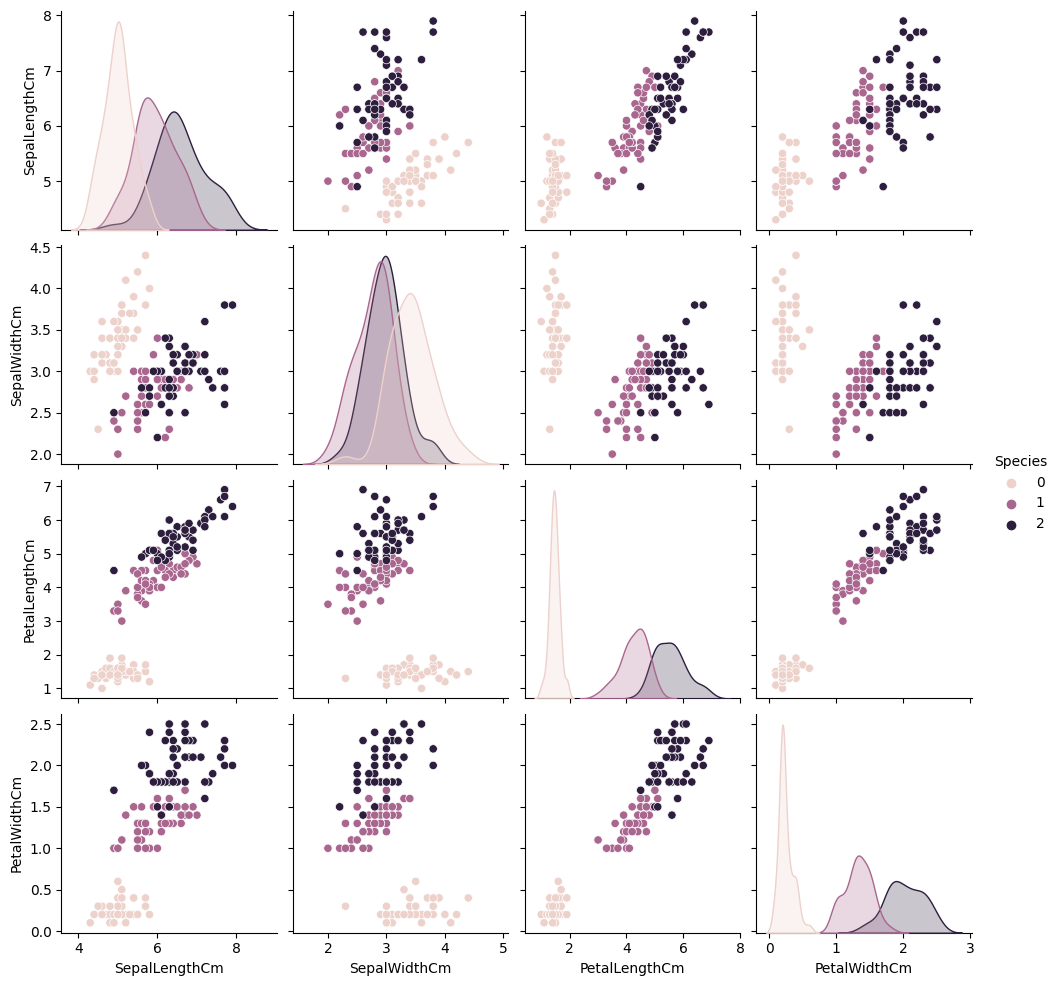

In [39]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [40]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [41]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [42]:
new_df.shape

(100, 3)

In [43]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [46]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [47]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.73
knn 0.76


In [48]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [49]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


## Soft Voting

In [50]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


## Weighted Voting

In [51]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.77
for i=1,j=1,k=3 0.76
for i=1,j=2,k=1 0.77
for i=1,j=2,k=2 0.77
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.74
for i=1,j=3,k=2 0.76
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.74
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.78
for i=3,j=2,k=2 0.76
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.76
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.76


## Classifiers of Same Algo

In [52]:
from sklearn.svm import SVC

In [53]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [54]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
